# Removing outliners from datasets.

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Read dataset

In [2]:
# loading the dataset
df = pd.read_csv('food_truck_data.txt')
# reading the head or top 5 instances of the dataframe 'df'
df.head()

,Population,Profit
0,6.1101,70.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Checking which columns are continuous variables so that outliers can be removed from them.
- pandas 'describe' method shows only continuous variables with: count, mean, standard deviation, minimum, maximum and quantile values.

 

In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,12.293821,8.581403
std,18.322020,17.513351
min,5.026900,-56.421100
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,9.453600,7.225800
max,98.180200,90.055100


Here it can be seen that mean, 75% quartile have value very less than maximum value.
**Note:** This gives a little hint about the outliers present in the dataset.
<hr>
<h2> Let's identify outliers by visulaization.</h2>

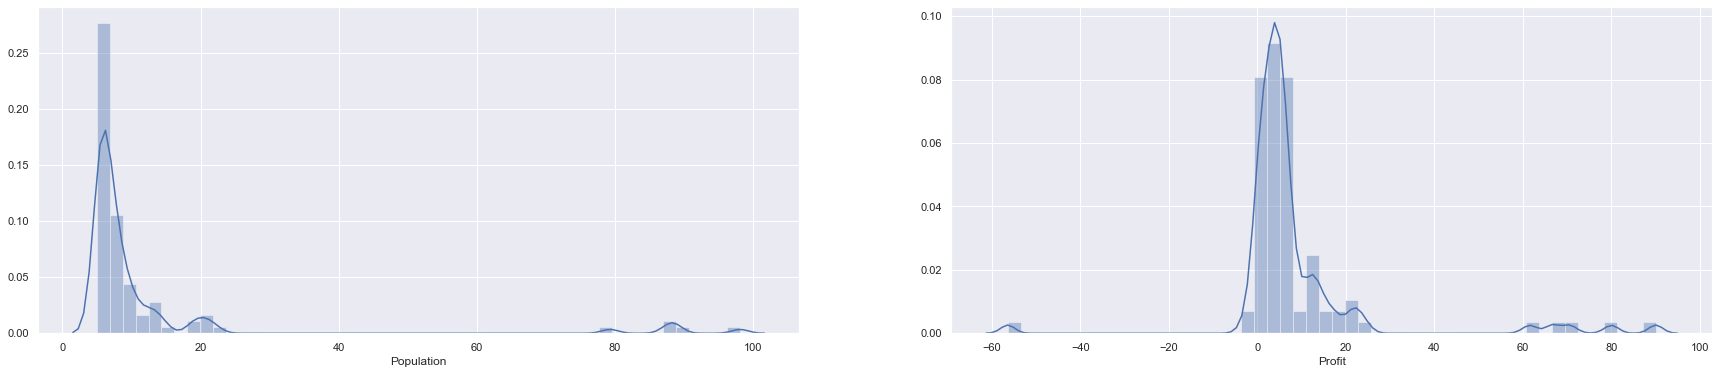

In [5]:
# Ploting dist for all the columns in the dataframe
plt.subplot(121)
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['Population']);

plt.subplot(122)
sns.distplot(df['Profit']);

plt.show()

It can be seen that there are some outliers present in both population and profit column.
<hr>
<b>Let's find out outliers separately by columns.</b>

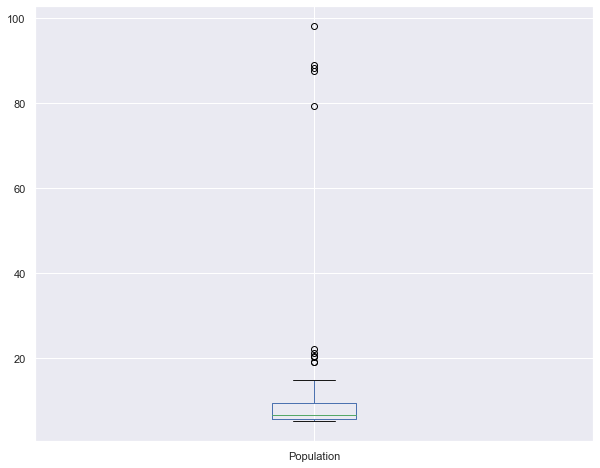

In [6]:
# Ploting boxplot to identify outliers in the Population column
df['Population'].plot.box(figsize=(10,8))

<b>Hence,</b> it can be seen that there are few values that can be identified as outliers.<hr>
### Removing outliers from the Population column.

In [7]:
x = df['Population']
# removing outliers that do not comes in between the lower quantile of 0.10
# and upper quantile of 0.90 
removed_outliers_pp = x.between(x.quantile(.10),x.quantile(0.9))
#checking size without outliers
x[removed_outliers_pp].size

77

Pandas between() method is used on series to check which values lie between first and second argument.
inclusive: A Boolean value which is True by default. If False, it excludes the two passed arguments while checking.


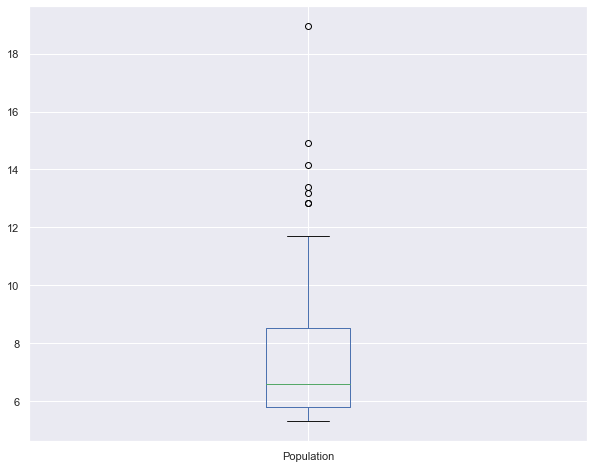

In [8]:
#ploting Population column without outliers
x[removed_outliers_pp].plot.box(figsize=(10,8))

As it can be seen outliers are removed from it.
<hr>
<b> Now, let's remove these outliers from original dataframe.
</b>

In [9]:
#counting values of outliers 
removed_outliers_pp.value_counts()

True     77
False    20
Name: Population, dtype: int64

Here, False are the outliers.<hr>
<b>Let's find the index of the outliers so that they can be removed.

In [10]:
# This will show the index of all the outliers in Population column
index_to_remove = df[~removed_outliers_pp].index
index_to_remove

Int64Index([7, 9, 17, 21, 29, 30, 36, 46, 61, 62, 64, 69, 71, 74, 77, 79, 81,
            86, 89, 94],
           dtype='int64')

In [11]:
# Removing these indexes from original datadrame
df.drop(index_to_remove,inplace=True)
df

,Population,Profit
0,6.1101,70.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
91,7.6366,4.29590
92,5.8707,7.20290
93,5.3054,1.98690
95,13.3940,90.05510


### All the outliers of the Population column are removed.
<hr>
<b>Let's remove outliers in Profit column</b>

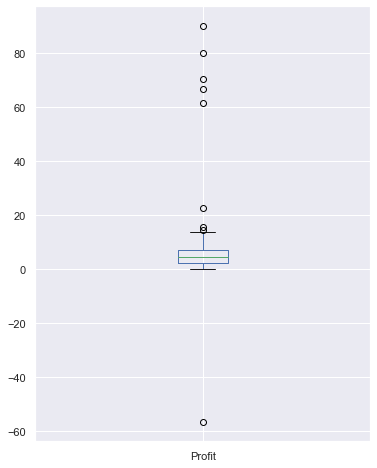

In [12]:
# Ploting boxplot to identify outliers in the Profit column
df['Profit'].plot.box(figsize=(6,8))

<b>Hence,</b> it can be seen that there are few values that can be identified as outlinrs.<hr>
### Removing outliers from the Profit column.

In [13]:
y = df['Profit']
# removing outliers that do not comes in between the lower quantile of 0.10
# and upper quantile of 0.90 
removed_outliers_pr = y.between(y.quantile(.10),y.quantile(0.9))
#checking size without outliers
y[removed_outliers_pr].size

61

Pandas between() method is used on series to check which values lie between first and second argument.
inclusive: A Boolean value which is True by default. If False, it excludes the two passed arguments while checking.

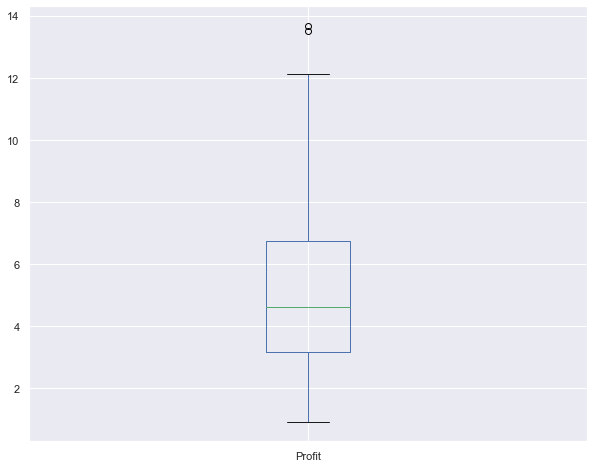

In [14]:
#ploting Population column without outliers
y[removed_outliers_pr].plot.box(figsize=(10,8))

As it can be seen outliers are removed from it.
<hr>
<b> Now, let's remove these outliers from original dataframe.
</b>

In [15]:
#counting values of outliers 
removed_outliers_pr.value_counts()

True     61
False    16
Name: Profit, dtype: int64

Here, False are the outliers.<hr>
<b>Let's find the index of the outliers so that they can be removed.

In [16]:
# This will show the index of all the outliers in Profit column
index_to_remove1 = df[~removed_outliers_pr].index
index_to_remove1

Int64Index([0, 11, 14, 25, 28, 34, 40, 48, 55, 70, 75, 80, 82, 88, 95, 96], dtype='int64')

In [17]:
# Removing these indexes from original datadrame
df.drop(index_to_remove1,inplace=True)
df

,Population,Profit
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
...,...,...
87,6.0020,0.92695
90,5.7077,1.84510
91,7.6366,4.29590
92,5.8707,7.20290


### All the outliers of the Profit column are removed.

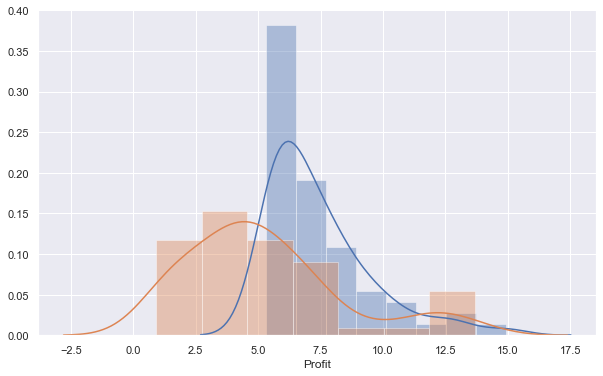

In [18]:
# ploting dataframe to check if all the outliers are removed or not
sns.distplot(df.Population)
sns.distplot(df.Profit)

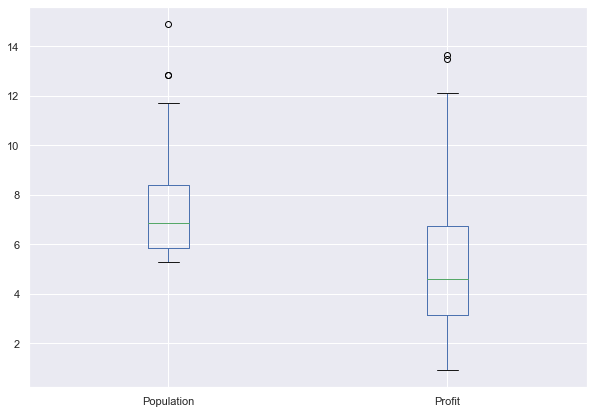

In [19]:
df.plot.box(figsize=(10,7))

## Therefore, all the outliers have been removed from the dataframe.